In [85]:
%matplotlib inline
# use results from panda_detector_K_gridsearch.py
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn import metrics
import numpy as np

# Load from pickles generated in panda_detector_K_gridsearch.py
results = joblib.load('pickles/k_grid_result/result.pickle')

for obj_name in ['X_train', 'X_test', 'X_val', 'y_train', 'y_test', 'y_val']:
    exec("{obj_name} = joblib.load('pickles/k_grid_feature_data/{obj_name}.pickle')".format(obj_name=obj_name))

print 'train:', len(X_train)
print 'test:', len(X_test)
print 'val:', len(X_val)
    

K_vals = sorted(results.keys())
for K in K_vals:
    print 'For K = %i:\tSVM %f\tAdaBoost %f\tK-Means Inertia %f' % (
        K, results[K]['svm_score'], results[K]['ada_score'], results[K]['inertia']);


train: 944
test: 202
val: 202
For K = 50:	SVM 0.866337	AdaBoost 0.846535	K-Means Inertia 35687298176.183937
For K = 150:	SVM 0.851485	AdaBoost 0.821782	K-Means Inertia 32011635638.862656
For K = 300:	SVM 0.856436	AdaBoost 0.821782	K-Means Inertia 29823263304.138237
For K = 500:	SVM 0.891089	AdaBoost 0.861386	K-Means Inertia 28436432214.062637


In [86]:
# right now my best is the SVM as K=150

svc = results[500]['svmGS']
print svc.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


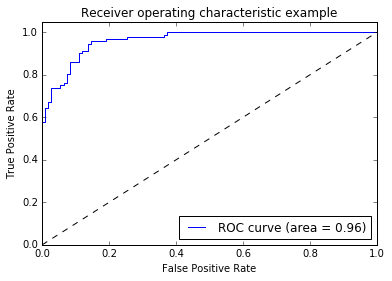

In [87]:
y_score = svc.decision_function(X_test) #dist of samples to the boundary hyperplane
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, pos_label='True')
roc_auc = metrics.auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

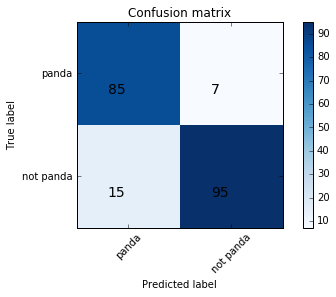

In [88]:
target_labels = ['True','False']
target_names = ['panda','not panda']

y_pred = svc.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred, labels=target_labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    for i, cas in enumerate(cm):
        for j, c in enumerate(cas):
            # formatting for ints vs floats
            if isinstance(c, int):
                plt.text(j-.2, i+.2, c, fontsize=14)
            else:
                plt.text(j-.2, i+.2, '%.2f' % c, fontsize=14)

plot_confusion_matrix(cm)

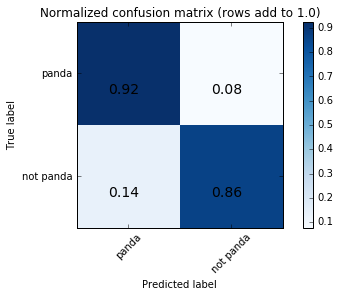

In [91]:
# rows add up to 1.0
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix (rows add to 1.0)')

In [90]:
print metrics.classification_report(y_test, y_pred, labels=target_labels, target_names=target_names)

             precision    recall  f1-score   support

      panda       0.85      0.92      0.89        92
  not panda       0.93      0.86      0.90       110

avg / total       0.89      0.89      0.89       202



# WARNING: This is all for test data. For the final analysis you want to use the final validation set (which has been untouched so far) instead.